### Project - Personal Loan Campaign

This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

#### Domain 
Banking


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Submitted by: Deep Singh Chauhan

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Load dataset into customer_df dataframe
customer_df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [4]:
#having insight of data by selecting 5 rows
customer_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
# checking size of dataframe
print('\033[1mShape of Dataset: \033[0m', customer_df.shape)

Shape of Dataset:  (5000, 14)


In [6]:
#checking datatype and not null count. We can see each column has 5000 rows so there is no missing values
print('\033[1mDatatype Info:\033[0m')
print()
customer_df.info()

Datatype Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
# another way of checking missing values. We can confirm ther is no missing value
print('\033[1mNull Value Info:\033[0m')
customer_df.isna().sum()

Null Value Info:


ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [8]:
# having look on statistical summary after ignore ID column
# Transposing it for better view
print('\033[1mStatistical Summary:\033[0m')
customer_df.iloc[:,1:].describe().T

Statistical Summary:


,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


### Exploratory Data Analysis  

In [9]:
# defininig funciton for printing unique values in one given column
def distinct_count(columnName):
    print(columnName, '\033[1m' +str(customer_df[columnName].nunique()) + '\033[0m', 'unique values')

In [10]:
# printing unique values in each column
print('\033[1mNumber of unique in each column:\033[0m')
print()
for col in customer_df.columns:
    distinct_count(col)

Number of unique in each column:

ID 5000 unique values
Age 45 unique values
Experience 47 unique values
Income 162 unique values
ZIP Code 467 unique values
Family 4 unique values
CCAvg 108 unique values
Education 3 unique values
Mortgage 347 unique values
Personal Loan 2 unique values
Securities Account 2 unique values
CD Account 2 unique values
Online 2 unique values
CreditCard 2 unique values


In [11]:
print('\033[1mNumber of people with zero mortgage:\033[0m')
customer_df[customer_df['Mortgage'] == 0]['Mortgage'].count()

Number of people with zero mortgage:


3462

In [12]:
print('\033[1mNumber of people with zero credit card spending per month:\033[0m')
customer_df[customer_df['CCAvg'] == 0]['CCAvg'].count()

Number of people with zero credit card spending per month:


106

In [13]:
print('\033[1mValue counts of all categorical columns:\033[0m')
# by reading problem statement and looking at output of number of unique in each colum 
# we can say below columns are categorical columns
# 'Family', Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard'
print('Family column')
print()
print(customer_df['Family'].value_counts())
print()
print('Education column')
print(customer_df['Education'].value_counts())
print()
print('Personal Loan column')
print(customer_df['Personal Loan'].value_counts())
print()
print('Securities Account column')
print(customer_df['Securities Account'].value_counts())
print()
print('CD Account column')
print(customer_df['CD Account'].value_counts())
print()
print('Online column')
print(customer_df['Online'].value_counts())
print()
print('CreditCard column')
print(customer_df['CreditCard'].value_counts())

Value counts of all categorical columns:
Family column

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

Education column
1    2096
3    1501
2    1403
Name: Education, dtype: int64

Personal Loan column
0    4520
1     480
Name: Personal Loan, dtype: int64

Securities Account column
0    4478
1     522
Name: Securities Account, dtype: int64

CD Account column
0    4698
1     302
Name: CD Account, dtype: int64

Online column
1    2984
0    2016
Name: Online, dtype: int64

CreditCard column
0    3530
1    1470
Name: CreditCard, dtype: int64


In [14]:
# we can achieve same above output using groupby and then count() function. for exmaple
customer_df.groupby('CreditCard').count()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online
CreditCard,,,,,,,,,,,,,
0,3530,3530,3530,3530,3530,3530,3530,3530,3530,3530,3530,3530,3530
1,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470


Univariate and Bivariate:

Age distribution:


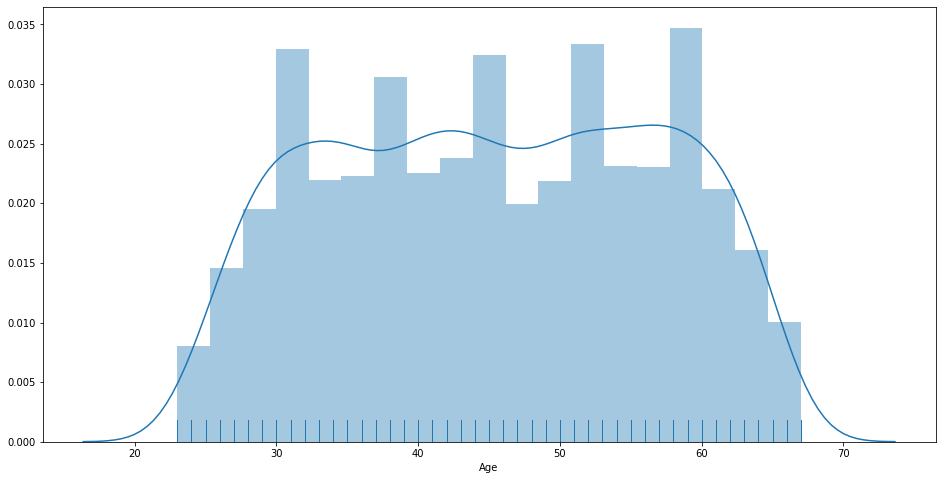

In [15]:
print('\033[1mUnivariate and Bivariate:\033[0m')
print()
print('Age distribution:')
plt.figure(figsize=(16,8))
sns.distplot(customer_df['Age'], rug=True)
plt.show()

Experience distribution:


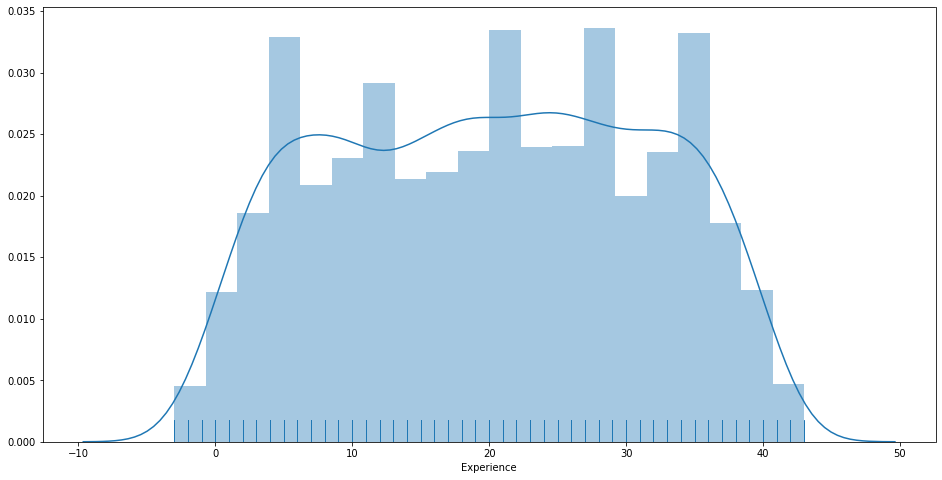

In [16]:
print('Experience distribution:')
plt.figure(figsize=(16,8))
sns.distplot(customer_df['Experience'], rug=True)
plt.show()

Income distribution:


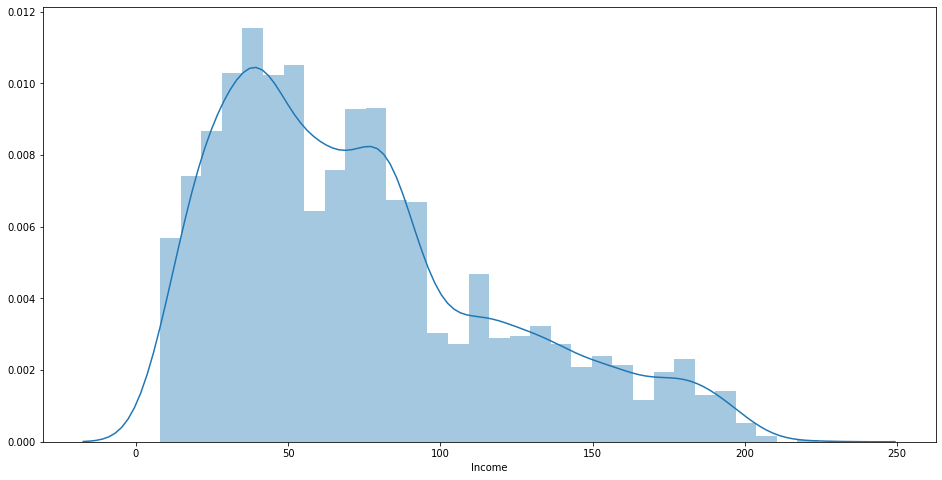

In [17]:
print('Income distribution:')
plt.figure(figsize=(16,8))
sns.distplot(customer_df['Income'])
plt.show()

Mortgage distribution:


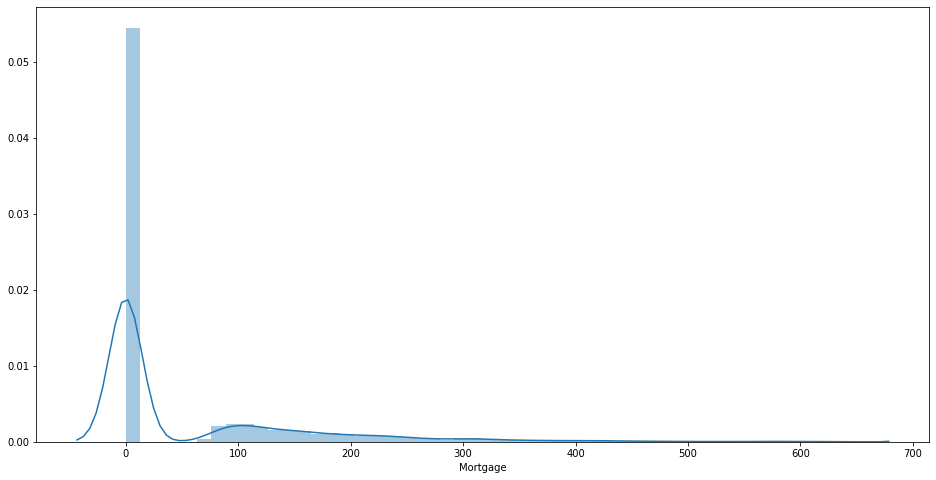

In [18]:
print('Mortgage distribution:')
plt.figure(figsize=(16,8))
sns.distplot(customer_df['Mortgage'])
plt.show()

Income distribution:


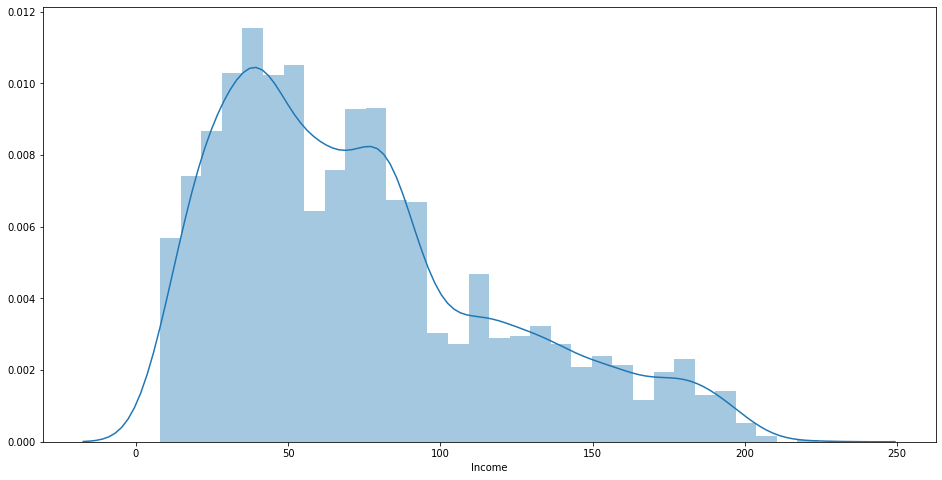

In [19]:
print('Income distribution:')
plt.figure(figsize=(16,8))
sns.distplot(customer_df['Income'])
plt.show()

Family distribution over Loan:


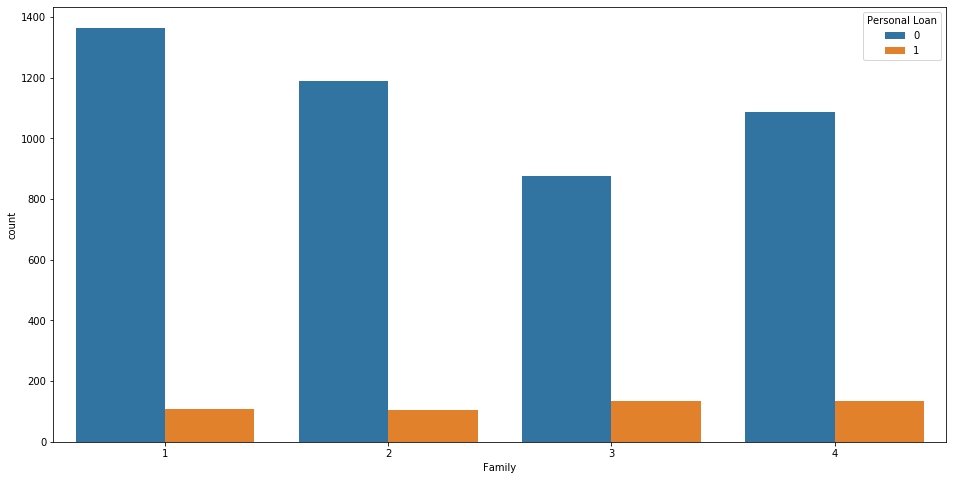

In [20]:
print('\033[1mFamily distribution over Loan:\033[0m')
plt.figure(figsize=(16,8))
sns.countplot(x = 'Family',data=customer_df,hue='Personal Loan')
plt.show()

Heat Map of correlation:


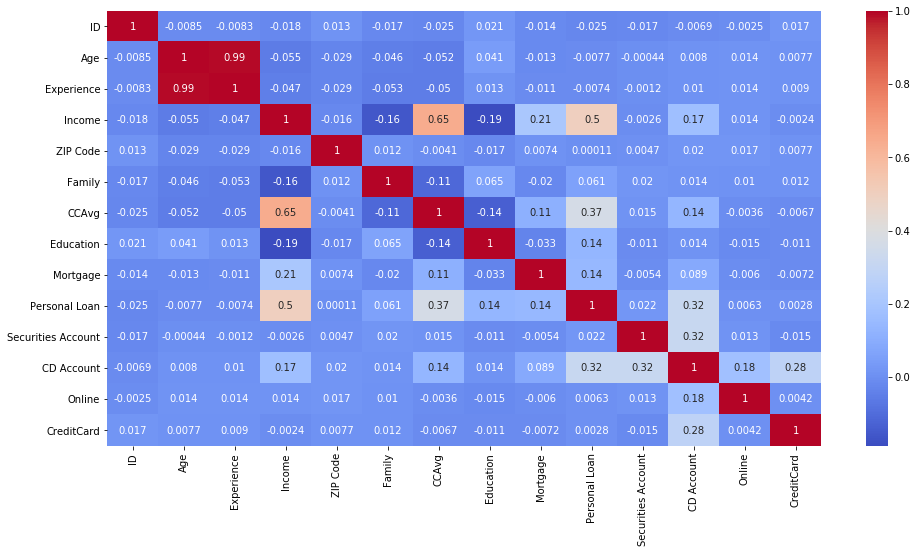

In [21]:
print('Heat Map of correlation:')
plt.figure(figsize=(16,8))
#sns.countplot(x = 'Family',data=customer_df,hue='Personal Loan')
sns.heatmap(customer_df.corr(),cmap='coolwarm',annot=True)
plt.show()

In [22]:
print('\033[1mGet data model ready:\033[0m')
# creating dummies for Family and Education column. Others categorical columns has only 0 or 1 value

Get data model ready:


In [23]:
customer_df = pd.get_dummies(customer_df, columns=['Family'],drop_first=True)

In [24]:
customer_df = pd.get_dummies(customer_df, columns=['Education'],drop_first=True)

In [25]:
# quick check of the final dataframe for model
customer_df.head()

,ID,Age,Experience,Income,ZIP Code,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3
0,1,25,1,49,91107,1.6,0,0,1,0,0,0,0,0,1,0,0
1,2,45,19,34,90089,1.5,0,0,1,0,0,0,0,1,0,0,0
2,3,39,15,11,94720,1.0,0,0,0,0,0,0,0,0,0,0,0
3,4,35,9,100,94112,2.7,0,0,0,0,0,0,0,0,0,1,0
4,5,35,8,45,91330,1.0,0,0,0,0,0,1,0,0,1,1,0


In [26]:
# quick summary of the data columns
customer_df.describe()

,ID,Age,Experience,Income,ZIP Code,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Family_2,Family_3,Family_4,Education_2,Education_3
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,1.937938,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000,0.259200,0.202000,0.244400,0.280600,0.300200
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.747659,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637,0.438239,0.401532,0.429774,0.449337,0.458391
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,0.700000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,1.500000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,2.500000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,10.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Split the data into training and test set in the ratio of 70:30 respectively

In [27]:
from sklearn.model_selection import train_test_split

# separating dependent and independent variables

# dropping ID and Personal Loan column to create independent variable
X = customer_df.drop(["ID","Personal Loan"],axis=1)

# preparing dependent variable as 'Personal Loan' 
y = customer_df['Personal Loan'].astype('category')

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [29]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(customer_df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(customer_df.index)) * 100))

70.00% data is in training set
30.00% data is in test set


### Logistic Regression model

In [30]:
#Build the logistic regression model
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
y_predict = logreg.predict(X_test)
# y_predict has values for customers if they will take the loan or not. 

In [32]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    plt.figure(figsize=(10,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.9057142857142857

Testing accuracy 0.912

Confusion Matrix


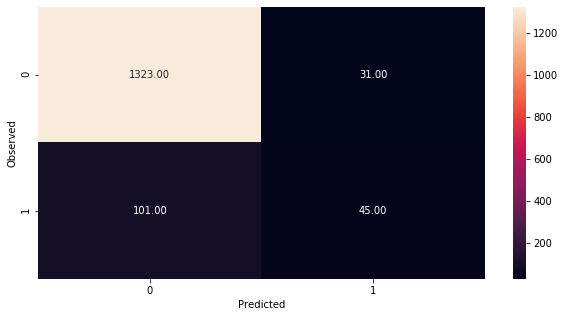

None

Recall: 0.3082191780821918

Precision: 0.5921052631578947

F1 Score: 0.4054054054054054

Roc Auc Score: 0.6426620262641388


In [33]:
print("Trainig accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

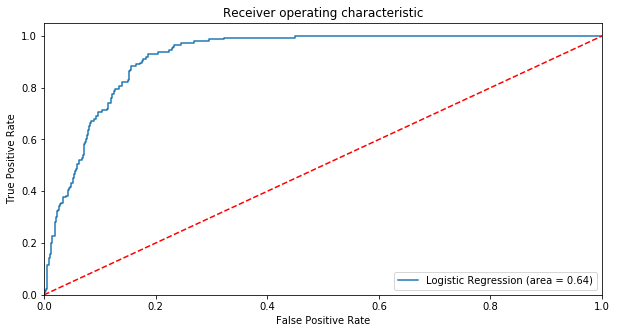

In [35]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Check parameter

In [36]:
# Checking Parameters of logistic regression
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [37]:
# Running a loop to check different values of 'solver'
# all solver can be used with l2, only 'liblinear' and 'saga' works with both 'l1' and 'l2'

train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l2', C = 0.75,solver=i)  # changing values of solver
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.962, 0.906, 0.907, 0.905, 0.905]

[0.955, 0.912, 0.913, 0.903, 0.903]


In [38]:
train_score=[]
test_score=[]
solver = ['liblinear','saga']   # changing values of solver which works with 'l1'
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l1', C = 0.75,solver=i)  #changed penalty to 'l1'
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['liblinear', 'saga']

[0.963, 0.905]

[0.955, 0.903]


#### Highest accuracy is 'l1' with 'liblinear' so choosing 'l1' with 'liblinear'

In [39]:
model = LogisticRegression(random_state=42,penalty='l1',solver='liblinear',class_weight='balanced') # changing class weight to balanced

model.fit(X_train, y_train) 

y_predict = model.predict(X_test)     

print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))

Trainig accuracy 0.9122857142857143

Testing accuracy 0.91


In [40]:
# Testing accuracy increased and model is not overfit anymore so adding class weight from the model

In [41]:
# Running a loop to check different values of 'C'

train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear',class_weight='balanced', C=i)  # changing values of C
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(X_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print()
print(train_score)
print()
print(test_score)

[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.855, 0.909, 0.912, 0.914, 0.913, 0.912]

[0.849, 0.907, 0.909, 0.911, 0.91, 0.91]


In [42]:
# Best testing accuracy is obtained for C=0.5

Trainig accuracy 0.9142857142857143

Testing accuracy 0.9106666666666666

Confusion Matrix


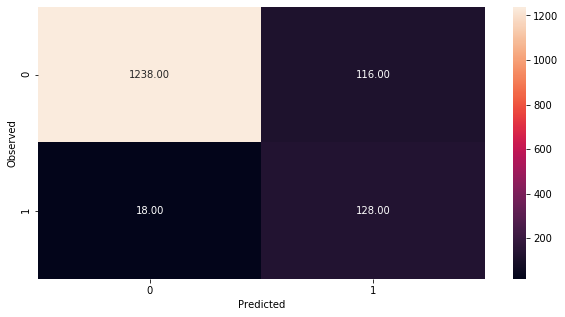

None

Recall: 0.8767123287671232

Precision: 0.5245901639344263

F1 Score: 0.6564102564102564

Roc Auc Score: 0.8955201230246251


In [43]:
#Therefore final model is
model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear', class_weight='balanced',C=0.5) 
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

### Business understanding

Confusion matrix means

True Positive (observed=1,predicted=1): Predicted that customer will be taking personal loan and model predicted same

False Positive (observed=0,predicted=1): Predicted that customer will take personal loan and even though mode did not predicted it

True Negative (observed=0,predicted=0): Predicted that customer will not take personal loan and model says the same

False Negative (observed=1,predicted=0): Predicted that customer will not take loan but model predicted that customer will take loan


Here bank want to converting its liability customers to personal loan customers. Bank can use the model for focused marketing campaigns to High number of true positive will help bank to convert customer to personal loan customers

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Assignment Completed

Project work is checked in to github on below path:

https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-may20-deepkanpur